In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("spambase.data", header=None)

In [18]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [20]:
df[df[57] == 1].shape

(1813, 58)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [29]:
parameters = {'max_depth':[1, 20]}
tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tree, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [30]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [32]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [60]:
from sklearn.metrics import classification_report

parameters = {'max_depth':[x for x in range(1,20)]}
tree = DecisionTreeClassifier(random_state=0)
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(tree, parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 8}

Grid scores on development set:

0.826 (+/-0.037) for {'max_depth': 1}
0.884 (+/-0.028) for {'max_depth': 2}
0.874 (+/-0.020) for {'max_depth': 3}
0.911 (+/-0.020) for {'max_depth': 4}
0.909 (+/-0.015) for {'max_depth': 5}
0.915 (+/-0.014) for {'max_depth': 6}
0.913 (+/-0.013) for {'max_depth': 7}
0.920 (+/-0.010) for {'max_depth': 8}
0.920 (+/-0.016) for {'max_depth': 9}
0.917 (+/-0.010) for {'max_depth': 10}
0.917 (+/-0.011) for {'max_depth': 11}
0.916 (+/-0.008) for {'max_depth': 12}
0.912 (+/-0.012) for {'max_depth': 13}
0.913 (+/-0.014) for {'max_depth': 14}
0.913 (+/-0.012) for {'max_depth': 15}
0.914 (+/-0.010) for {'max_depth': 16}
0.919 (+/-0.019) for {'max_depth': 17}
0.914 (+/-0.020) for {'max_depth': 18}
0.914 (+/-0.013) for {'max_depth': 19}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluatio

In [50]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=8)
clf = clf.fit(x_train, y_train)

tree.export_graphviz(clf,out_file="tree.dot") 

y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9174809989142236

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)



parameters = {'max_depth':[x for x in range(1,20)], "n_estimators":[x for x in range(20,50)]}
tree = RandomForestClassifier()
scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(tree, parameters, cv=5,
                       scoring=score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 16, 'n_estimators': 17}

Grid scores on development set:

0.771 (+/-0.031) for {'max_depth': 1, 'n_estimators': 1}
0.737 (+/-0.101) for {'max_depth': 1, 'n_estimators': 2}
0.794 (+/-0.045) for {'max_depth': 1, 'n_estimators': 3}
0.793 (+/-0.067) for {'max_depth': 1, 'n_estimators': 4}
0.825 (+/-0.082) for {'max_depth': 1, 'n_estimators': 5}
0.811 (+/-0.034) for {'max_depth': 1, 'n_estimators': 6}
0.834 (+/-0.053) for {'max_depth': 1, 'n_estimators': 7}
0.832 (+/-0.038) for {'max_depth': 1, 'n_estimators': 8}
0.808 (+/-0.024) for {'max_depth': 1, 'n_estimators': 9}
0.831 (+/-0.018) for {'max_depth': 1, 'n_estimators': 10}
0.807 (+/-0.065) for {'max_depth': 1, 'n_estimators': 11}
0.818 (+/-0.040) for {'max_depth': 1, 'n_estimators': 12}
0.817 (+/-0.023) for {'max_depth': 1, 'n_estimators': 13}
0.824 (+/-0.026) for {'max_depth': 1, 'n_estimators': 14}
0.835 (+/-0.018) for {'max_depth': 1, 

In [63]:
import numpy as np
import random
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#todo split datause for confusion matrix
def rand_search(clf, param_dist, x, y, cv=5, n_iter_search=20):
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
    
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=cv, iid=False)
    start = time()
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(random_search.cv_results_)
    results = random_search.cv_results_
    y_pred = random_search.predict(x_test)
    cm = confusion_matrix(list(y_test), list(y_pred))
    return {"results":results,"confusion_matrix":cm}



In [66]:
clf = RandomForestClassifier()



parameters = {'max_depth':[x for x in range(1,20)], "n_estimators":[x for x in range(20,500)]}

rand_search(clf, parameters, x_train, y_train, cv=5, n_iter_search=20)

RandomizedSearchCV took 50.41 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.948 (std: 0.007)
Parameters: {'n_estimators': 308, 'max_depth': 19}

Model with rank: 2
Mean validation score: 0.946 (std: 0.004)
Parameters: {'n_estimators': 469, 'max_depth': 16}

Model with rank: 3
Mean validation score: 0.945 (std: 0.005)
Parameters: {'n_estimators': 418, 'max_depth': 16}



{'results': {'mean_fit_time': array([0.04394946, 1.08537126, 0.18918571, 0.87052703, 0.34723525,
         0.15368171, 0.72506113, 0.10014091, 0.6235642 , 0.29786763,
         0.88814721, 0.02572255, 0.98788953, 0.03324485, 0.24177723,
         0.42300305, 0.88877974, 0.84461451, 0.10340734, 0.60727844]),
  'std_fit_time': array([0.00501764, 0.01800868, 0.00289252, 0.00744315, 0.0031674 ,
         0.00156562, 0.00569641, 0.00115541, 0.00540853, 0.00311124,
         0.02238096, 0.00080072, 0.01987097, 0.00155167, 0.00997054,
         0.00616473, 0.00967504, 0.01379255, 0.00173449, 0.00678847]),
  'mean_score_time': array([0.00276823, 0.04403553, 0.00816083, 0.03457093, 0.01485057,
         0.01295738, 0.02904377, 0.00540323, 0.03038568, 0.01331429,
         0.03657632, 0.00250726, 0.03945537, 0.00315032, 0.01519895,
         0.01719494, 0.03544555, 0.03428006, 0.0077352 , 0.02453089]),
  'std_score_time': array([4.52046656e-05, 3.34965568e-03, 2.10354917e-05, 5.48456827e-04,
         1.7

In [70]:
from sklearn.metrics import roc_auc_score

tree = DecisionTreeClassifier(random_state=0, max_depth = 8).fit(x_train, y_train)
y_pred = tree.predict(x_test)

auc_tree = roc_auc_score(y_test, y_pred)
print(auc_tree)


r_tree = RandomForestClassifier(random_state=0, max_depth = 17, n_estimators=121).fit(x_train, y_train)
y_pred = r_tree.predict(x_test)

auc_tree = roc_auc_score(y_test, y_pred)
print(auc_tree)


0.9109952194697958
0.9486165435317977


In [72]:
auc= []

for i in range (1,301):
    r_tree = RandomForestClassifier(random_state=0, max_depth = 10, n_estimators=i).fit(x_train, y_train)
    y_pred = r_tree.predict(x_test)
    auc_tree = roc_auc_score(y_test, y_pred)
    auc.append(auc_tree)
    


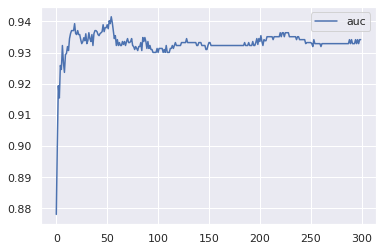

In [75]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(auc, columns =['auc'])

ax = sns.lineplot( data=df)


In [ ]:
df = pd.read_csv("q2/copper-new.txt",  header = None)
df.head